<a href="https://colab.research.google.com/github/flammarionick/Probability-Distributions_Group_9/blob/main/Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A **fraud detection system for credit card transactions**

1. **Poisson Distribution Implementation (NumPy)**

Numpy Implementation: [4.97870684e-02 1.49361205e-01 2.24041808e-01 2.24041808e-01
 1.68031356e-01 1.00818813e-01 5.04094067e-02 2.16040315e-02
 8.10151179e-03 2.70050393e-03 8.10151179e-04 2.20950322e-04
 5.52375804e-05 1.27471339e-05 2.73152870e-06 5.46305740e-07]
Scipy Implementation: [4.97870684e-02 1.49361205e-01 2.24041808e-01 2.24041808e-01
 1.68031356e-01 1.00818813e-01 5.04094067e-02 2.16040315e-02
 8.10151179e-03 2.70050393e-03 8.10151179e-04 2.20950322e-04
 5.52375804e-05 1.27471339e-05 2.73152870e-06 5.46305740e-07]


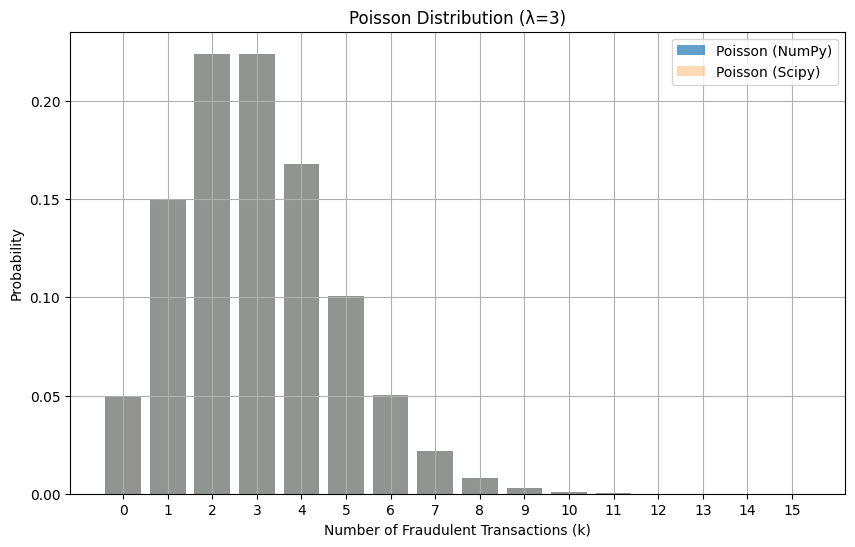

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math  # Import the math module
from scipy.stats import poisson

def poisson_probability(k, lambda_):
    """
    Calculates the Poisson probability of k events occurring given a rate lambda.

    Args:
        k (int or array-like): Number of events.
        lambda_ (float): Average rate of events.

    Returns:
        float or array-like: Poisson probability.
    """
    return (np.exp(-lambda_) * (lambda_**k)) / math.factorial(k) # Use math.factorial

def poisson_distribution_numpy(k_values, lambda_):
    """
    Calculates the Poisson distribution probabilities for a range of k values.

    Args:
        k_values (array-like): Array of k values.
        lambda_ (float): Average rate of events.

    Returns:
        array-like: Array of Poisson probabilities.
    """
    probabilities = []
    for k in k_values:
        probabilities.append(poisson_probability(k, lambda_))
    return np.array(probabilities)

# Parameters
lambda_ = 3  # Average rate of 3 fraudulent transactions per 10,000 transactions (or per day)
max_k = 15  # Maximum number of fraudulent transactions to visualize
k_values = np.arange(0, max_k + 1)

# Calculate probabilities using our numpy implementation
probabilities = poisson_distribution_numpy(k_values, lambda_)

# Calculate probabilities using scipy.stats for comparison
probabilities_scipy = poisson.pmf(k_values, lambda_)

# Print the values to verify.
print("Numpy Implementation:", probabilities)
print("Scipy Implementation:", probabilities_scipy)

# Visualization (Matplotlib):
plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities, alpha=0.7, label='Poisson (NumPy)')
plt.bar(k_values, probabilities_scipy, alpha=0.3, label = "Poisson (Scipy)")
plt.xlabel('Number of Fraudulent Transactions (k)')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (λ={lambda_})')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# BAYESIAN PROBABILITY

Updated Fraud Probability: 0.1404


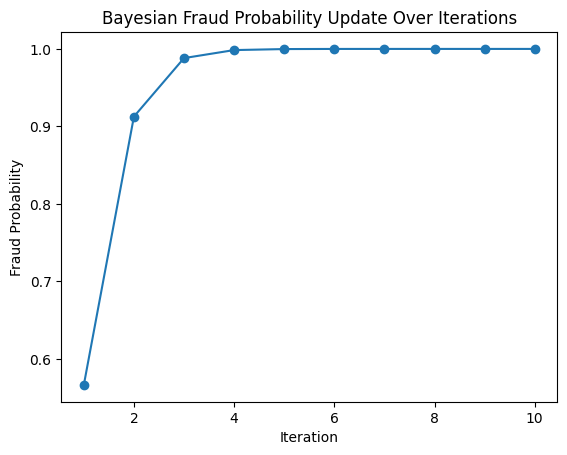

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bayesian_fraud_detection(prior_fraud, likelihood_fraud, likelihood_non_fraud):
    """
    Computes the posterior probability of fraud given evidence using Bayes' theorem.
    """
    evidence_probability = (likelihood_fraud * prior_fraud) + (likelihood_non_fraud * (1 - prior_fraud))
    posterior_fraud = (likelihood_fraud * prior_fraud) / evidence_probability
    return posterior_fraud

# Initial Prior (based on historical fraud rates)
prior_fraud = 0.02  # 2% fraud transactions historically

# Likelihoods (based on past fraud detection data)
likelihood_fraud = 0.8  # 80% chance a fraudulent transaction has a certain unusual pattern
likelihood_non_fraud = 0.1  # 10% chance a normal transaction has the same pattern

# Compute posterior
posterior_fraud = bayesian_fraud_detection(prior_fraud, likelihood_fraud, likelihood_non_fraud)
print(f"Updated Fraud Probability: {posterior_fraud:.4f}")

# Visualization
fraud_probabilities = []
iterations = np.arange(1, 11)
for i in iterations:
    prior_fraud = posterior_fraud  # Update prior with new posterior
    posterior_fraud = bayesian_fraud_detection(prior_fraud, likelihood_fraud, likelihood_non_fraud)
    fraud_probabilities.append(posterior_fraud)

plt.plot(iterations, fraud_probabilities, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Fraud Probability")
plt.title("Bayesian Fraud Probability Update Over Iterations")
plt.show()
